# Import Libraries

In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from lib_file import lib_path
import random
import pickle
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
# import tensorflow as tf

SEED = 42
random.seed(SEED)
np.random.seed(SEED)
# tf.random.set_seed(SEED)

import os
for dirname,_,filenames in os.walk('splitted_data'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

splitted_data\X_test.csv
splitted_data\X_train.csv
splitted_data\y_test.csv
splitted_data\y_train.csv


# Data Loading

In [2]:
X_train=pd.read_csv('splitted_data/X_train.csv')
X_test=pd.read_csv('splitted_data/X_test.csv')
y_train=pd.read_csv('splitted_data/y_train.csv')
y_test=pd.read_csv('splitted_data/y_test.csv')

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(5760, 26) (1440, 26) (5760, 1) (1440, 1)


In [3]:
X_train.head()

chroma_stft      rmse  spectral_centroid  spectral_bandwidth   rolloff  \
0     1.221106  0.489759          -0.924096           -0.363907 -0.930009   
1    -0.199008 -0.180450          -0.789674           -0.693342 -0.891214   
2    -0.765692 -0.162219          -0.642334           -0.654802 -0.521625   
3     1.885895 -0.708012           3.329272            1.432904  2.389501   
4    -0.963151 -1.162165          -1.327404           -1.073976 -0.988374   

   zero_crossing_rate     mfcc1     mfcc2     mfcc3     mfcc4  ...    mfcc11  \
0           -0.806040  0.959887  1.470180  0.646332  0.271406  ... -0.288815   
1           -0.416316 -0.209507  0.995692  0.304280 -1.197177  ...  1.150316   
2           -0.660194  0.260582  0.901346 -0.681222  0.130671  ...  0.461562   
3            5.147202  0.702458 -1.815012 -0.117043  1.843494  ... -1.711726   
4           -1.487455 -1.888065  1.572646 -0.031178  2.548571  ... -0.426204   

     mfcc12    mfcc13    mfcc14    mfcc15    mfcc16    mfcc17    mfcc18  \
0 -0.978882  1.133899 -0.062575 -1.097358  0.064739 -0.217500 -1.171090   
1 -3.942547  2.232592  0.037926  1.345543  0.662614 -0.272258 -1.381650   
2  0.079567  0.341312 -0.541997  1.231326  0.222736  0.789224 -0.799442   
3  4.061444 -0.912357  3.647447 -1.078892  2.077074 -1.106065  2.694307   
4  0.621573 -1.826044 -0.978930 -1.418808 -2.362313  0.757747 -1.687839   

     mfcc19    mfcc20  
0  0.479437  0.203392  
1 -0.839459 -1.398731  
2  0.309965  0.916710  
3  0.831225  0.624236  
4  0.951507 -0.471442  

[5 rows x 26 columns]

In [4]:
y_train.head()

label
0      0
1      0
2     29
3      6
4     52

In [5]:
X_test.head()

chroma_stft      rmse  spectral_centroid  spectral_bandwidth   rolloff  \
0     1.143992 -0.834295          -1.009085            0.119723 -0.991051   
1    -0.288032 -0.752863          -1.230409           -1.118162 -1.024468   
2    -0.555892  0.357656          -0.856210           -1.104357 -1.080052   
3     0.270173 -1.245677          -2.478459           -2.530704 -2.344040   
4     0.460676 -0.331581           0.379935            0.446198  0.245759   

   zero_crossing_rate     mfcc1     mfcc2     mfcc3     mfcc4  ...    mfcc11  \
0           -1.110918 -0.959042  0.967352  2.143267 -0.393980  ...  1.909041   
1           -1.187091 -0.919485  1.421181  0.420972 -0.064234  ...  1.001170   
2           -0.524524  0.241398  1.311977 -1.182157 -0.540949  ... -0.536692   
3           -1.863752 -2.773172  0.904292  3.408582 -0.162131  ...  1.219317   
4            0.405352  0.031567 -0.141099  0.688923 -1.617682  ...  0.390163   

     mfcc12    mfcc13    mfcc14    mfcc15    mfcc16    mfcc17    mfcc18  \
0  1.080552  1.331349  0.055925  0.496995  0.149232  0.652866  0.530859   
1 -0.528230  0.744344 -0.438578 -0.242111 -1.030312  0.127440 -1.123560   
2 -2.436175 -0.263173 -0.791016 -1.915047 -2.207200 -0.184792 -1.003268   
3  0.310560  0.880265  0.045700  1.637837  0.709559  0.484689 -1.365598   
4 -0.834915 -0.536783 -1.059625  1.009022 -0.037524 -0.507617 -0.637565   

     mfcc19    mfcc20  
0  0.833218  0.121678  
1 -0.692826 -0.822088  
2  0.361323  0.064834  
3 -0.862048 -1.314840  
4 -0.464992  0.783960  

[5 rows x 26 columns]

In [6]:
y_test.head()

label
0     34
1     48
2      9
3     28
4     62

---

<h1>SupportVectorClassifier</h1>

In [7]:
from sklearn.svm import SVC
SVC_model=SVC()
SVC_model=SVC_model.fit(X_train,y_train)

In [8]:
SVC_pred=SVC_model.predict(X_test)

In [9]:
print(SVC_pred.tolist())

[34, 48, 9, 28, 31, 17, 31, 70, 5, 50, 69, 20, 28, 36, 69, 29, 4, 0, 36, 2, 2, 35, 12, 21, 52, 39, 36, 20, 14, 3, 56, 20, 25, 41, 50, 56, 42, 61, 12, 37, 51, 54, 27, 11, 4, 66, 32, 36, 5, 0, 5, 33, 44, 39, 63, 33, 24, 20, 53, 48, 0, 50, 71, 12, 2, 13, 10, 58, 62, 14, 71, 35, 34, 17, 31, 36, 46, 65, 64, 9, 62, 19, 42, 62, 37, 32, 19, 29, 2, 68, 43, 60, 38, 32, 34, 63, 39, 69, 59, 14, 24, 15, 24, 41, 64, 64, 32, 59, 66, 16, 48, 1, 49, 17, 22, 47, 23, 1, 66, 2, 31, 47, 47, 7, 24, 50, 34, 40, 44, 65, 6, 63, 62, 68, 26, 50, 18, 47, 4, 38, 40, 8, 6, 6, 32, 67, 6, 63, 18, 32, 61, 0, 32, 10, 29, 57, 11, 19, 33, 18, 16, 28, 2, 10, 12, 37, 41, 31, 32, 31, 47, 27, 44, 42, 31, 35, 60, 9, 51, 53, 7, 29, 32, 51, 63, 65, 8, 38, 28, 12, 47, 60, 70, 35, 59, 51, 50, 67, 7, 9, 38, 21, 34, 53, 67, 32, 32, 30, 35, 39, 26, 15, 44, 70, 69, 32, 55, 46, 49, 21, 68, 9, 22, 21, 58, 25, 5, 25, 10, 61, 52, 4, 14, 66, 24, 20, 33, 6, 55, 3, 31, 48, 65, 31, 38, 19, 54, 46, 56, 42, 65, 31, 62, 23, 13, 7, 58, 31, 23, 6

In [10]:
class_labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72']

In [11]:
SVC_accuracy = accuracy_score(y_true=y_test,y_pred=SVC_pred)
print("Support Vector Classifier model accuracy is : {:.2f}%".format(SVC_accuracy*100.0))

Support Vector Classifier model accuracy is : 89.65%


In [12]:
print(classification_report(y_true=y_test, y_pred=SVC_pred, target_names=class_labels))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
           2       1.00      0.70      0.82        20
           3       0.76      0.65      0.70        20
           4       1.00      0.75      0.86        20
           5       1.00      0.90      0.95        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       1.00      1.00      1.00        20
           9       1.00      1.00      1.00        20
          10       0.82      0.70      0.76        20
          11       0.95      0.95      0.95        20
          12       1.00      0.85      0.92        20
          13       0.87      1.00      0.93        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00      0.90      0.95        20
          17       0.95      1.00      0.98        20
          18       1.00    

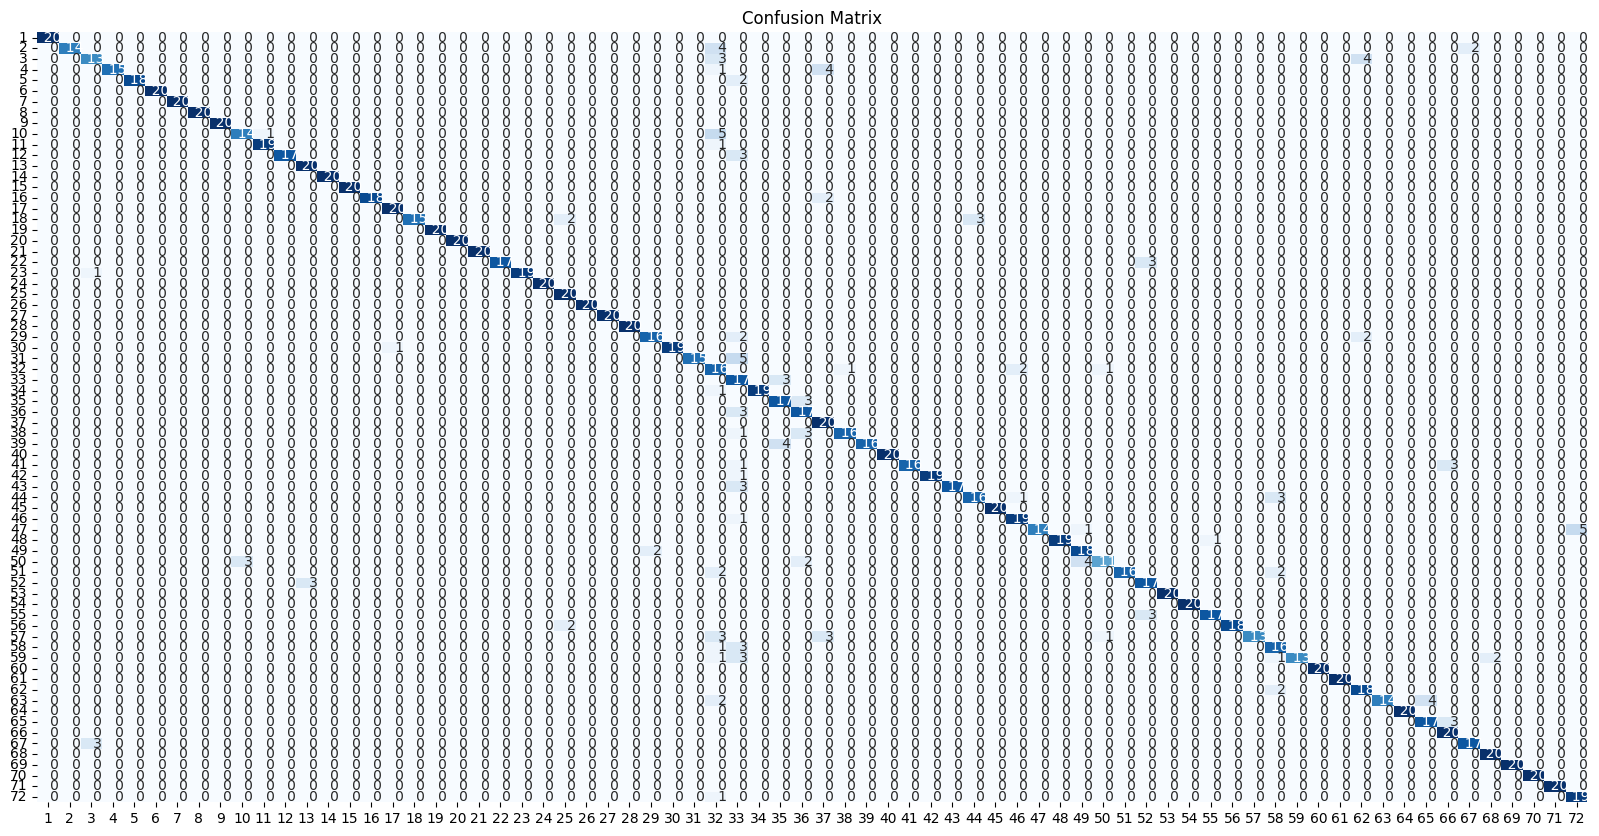

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(data=confusion_matrix(y_true=y_test,y_pred=SVC_pred),
            annot=True,
            fmt='4d',
            cbar=False,
            cmap=plt.cm.Blues,
           xticklabels=class_labels,
           yticklabels=class_labels)
plt.title(label='Confusion Matrix')
plt.show()

In [14]:
with open(file='models/SupportVectorClassifier_model.pkl',mode='wb') as file:
    pickle.dump(obj=SVC_model,file=file)

<h1>RandomForestClassifier</h1>

In [15]:
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier(n_estimators=3)
RF_model=RF_model.fit(X_train,y_train)

In [16]:
RF_pred=RF_model.predict(X_test)

In [17]:
print(RF_pred.tolist())

[34, 48, 9, 28, 62, 17, 2, 70, 5, 50, 69, 20, 28, 36, 69, 29, 4, 0, 36, 2, 2, 35, 12, 21, 52, 39, 15, 20, 14, 3, 56, 20, 25, 41, 50, 56, 42, 61, 12, 31, 51, 54, 27, 11, 4, 66, 32, 36, 5, 0, 5, 33, 44, 39, 63, 33, 24, 20, 53, 48, 0, 50, 71, 12, 66, 13, 10, 58, 62, 14, 71, 35, 34, 17, 31, 15, 46, 65, 62, 9, 62, 19, 42, 62, 37, 57, 19, 29, 2, 68, 43, 60, 38, 30, 32, 63, 39, 69, 59, 14, 24, 15, 24, 41, 64, 64, 32, 59, 66, 16, 49, 1, 49, 17, 22, 47, 23, 1, 66, 22, 31, 47, 47, 7, 24, 50, 38, 40, 44, 65, 6, 63, 62, 68, 26, 50, 18, 47, 4, 38, 40, 8, 6, 6, 40, 67, 6, 63, 18, 30, 28, 0, 4, 10, 29, 57, 11, 19, 33, 18, 16, 28, 2, 10, 12, 37, 41, 9, 30, 1, 47, 27, 44, 42, 31, 34, 60, 9, 51, 53, 7, 29, 11, 51, 63, 65, 8, 38, 28, 12, 47, 60, 70, 35, 59, 51, 50, 67, 7, 9, 38, 21, 34, 53, 67, 28, 32, 30, 35, 39, 26, 15, 44, 70, 69, 32, 55, 46, 49, 21, 68, 9, 22, 21, 58, 25, 5, 25, 10, 61, 52, 4, 14, 66, 24, 20, 33, 6, 55, 3, 31, 48, 65, 31, 38, 19, 54, 46, 56, 42, 64, 3, 62, 23, 13, 7, 58, 58, 23, 6, 3

In [18]:
class_labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72']

In [19]:
RF_accuracy = accuracy_score(y_true=y_test,y_pred=RF_pred)
print("RandomForestClassifier model accuracy is : {:.2f}%".format(RF_accuracy*100.0))

RandomForestClassifier model accuracy is : 99.72%


In [20]:
# print(classification_report(y_true=y_test, y_pred=RF_pred, target_names=class_labels))

print(classification_report(y_true=y_test, y_pred=RF_pred, target_names=class_labels))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       1.00      1.00      1.00        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        20
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00      1.00      1.00        20
          17       1.00      1.00      1.00        20
          18       1.00    

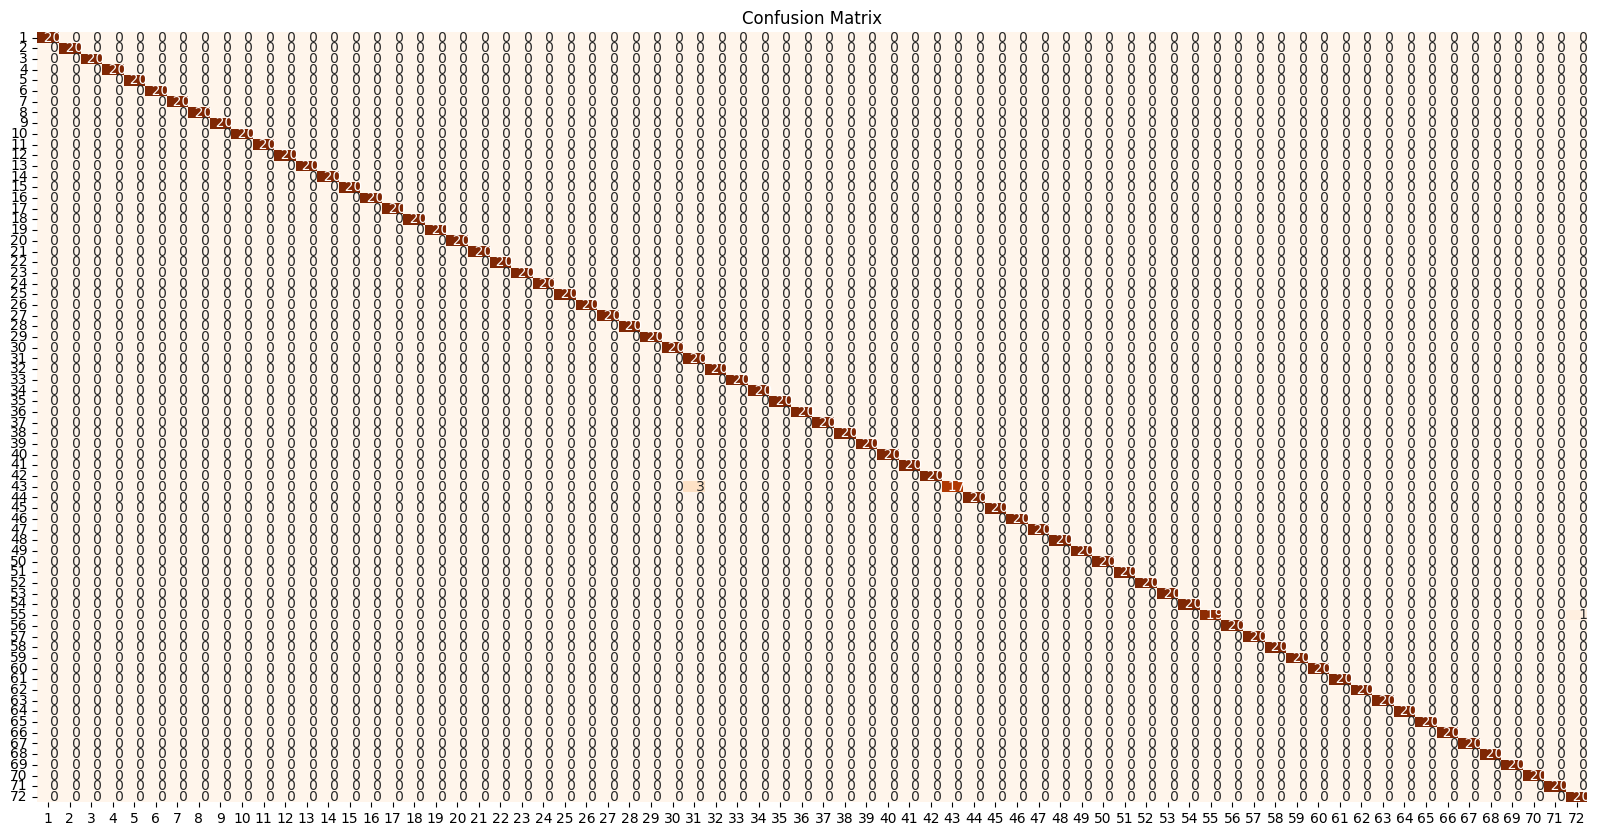

In [21]:
plt.figure(figsize=(20,10))
sns.heatmap(data=confusion_matrix(y_true=y_test,y_pred=RF_pred),
            annot=True,
            fmt='4d',
            cbar=False,
            cmap=plt.cm.Oranges,
           xticklabels=class_labels,
           yticklabels=class_labels)
plt.title(label='Confusion Matrix')
plt.show()

In [22]:
with open(file='models/RandomForestClassifier_model.pkl',mode='wb') as file:
    pickle.dump(obj=RF_model,file=file)

---